In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
df.shape

(2200, 8)

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.isnull().sum()  # here data has no null values 
# if null values are present then we have to use Fill NA function and we have to replace the unfilled values by mean, median oe mode depending on conditions
# pandas is having function like fill NA and drop NA, we have to use that

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# lets check the crops pressnet in this dataset

df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
# lets check the summary for all the crops
def sodium_ratio():
    print('Average ratio of Nitrogen in the soil is: {0: .2f}' .format(df['N'].mean()))  # here {0: .2f} means to round off the value to 2 decimal places
    
def phos_ratio():
    print('Average ratio of Phosphorous in the soil is: {0: .2f}'.format(df['P'].mean()))

def potash_ratio():
    print('Average ratio of Potassium in the soil is: {0: .2f}'.format(df['K'].mean()))
    
def temp():
    print('Average ratio of temperature is: {0: .2f}'.format (df['temperature'].mean()))
    
def humidity():
    print('Average ratio of humidity is: {0: .2f}'.format (df['humidity'].mean()))
    
def pH():
    print('Average ratio of pH is: {0: .2f}'.format (df['ph'].mean()))
    
def rainfall():
    print('Average ratio of rainfall is: {0: .2f}'.format (df['rainfall'].mean()))

In [10]:
sodium_ratio()
phos_ratio()
potash_ratio()
temp()
humidity()
pH()
rainfall()


Average ratio of Nitrogen in the soil is:  50.55
Average ratio of Phosphorous in the soil is:  53.36
Average ratio of Potassium in the soil is:  48.15
Average ratio of temperature is:  25.62
Average ratio of humidity is:  71.48
Average ratio of pH is:  6.47
Average ratio of rainfall is:  103.46


In [11]:
# lets check the summary statistics for each of the crops

@interact
def summary(crops=list(df['label'].value_counts().index)):
    x =df[df['label']==crops]
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR NITROGEN')
    print('=======================================================================')
    print('Minimum Nitrogen required: ',x['N'].min())
    print('Average Nitrogen required: ',x['N'].mean())
    print('Maximum Nitrogen required: ',x['N'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR PHOSPHOROUS')
    print('=======================================================================')
    print('Minimum phosphorous required: ',x['P'].min())
    print('Average phosphorous required: ',x['P'].mean())
    print('Maximum phosphorous required: ',x['P'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR POTASSIUM')
    print('=======================================================================')
    print('Minimum potassium required: ',x['K'].min())
    print('Average potassium required: ',x['K'].mean())
    print('Maximum potassium required: ',x['K'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR TEMPERATURE')
    print('=======================================================================')
    print('Minimum temperature required: ',x['temperature'].min())
    print('Average temperature required: ',x['temperature'].mean())
    print('Maximum temperature required: ',x['temperature'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR HUMIDITY')
    print('=======================================================================')
    print('Minimum humidity required: ',x['humidity'].min())
    print('Average humidity required: ',x['humidity'].mean())
    print('Maximum humidity required: ',x['humidity'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR PH')
    print('=======================================================================')
    print('Minimum ph required: ',x['ph'].min())
    print('Average ph required: ',x['ph'].mean())
    print('Maximum ph required: ',x['ph'].max())
    print('-----------------------------------------------------------------------')
    print('STATISTICS FOR RAINFALL')
    print('=======================================================================')
    print('Minimum rainfall required: ',x['rainfall'].min())
    print('Average rainfall required: ',x['rainfall'].mean())
    print('Maximum rainfall required: ',x['rainfall'].max())
  

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [12]:
# lets compare the average requirement for each crops with average conditions

@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
        print('Average value for', conditions,"{0: .2f}".format(df[conditions].mean()))
        print('=========================================================================')
        print('Rice: {0: .2f}'.format(df[(df['label']=='rice')][conditions].mean()))
        print('Maize: {0:.2f}'.format(df[(df['label']=='maize')][conditions].mean()))
        print('Jute: {0:.2f}'.format(df[(df['label']=='jute')][conditions].mean()))
        print('Cotton: {0:.2f}'.format(df[(df['label']=='cotton')][conditions].mean()))
        print('Coconut: {0:.2f}'.format(df[(df['label']=='coconut')][conditions].mean()))
        print('Papaya: {0:.2f}'.format(df[(df['label']=='papaya')][conditions].mean()))
        print('Orange: {0:.2f}'.format(df[(df['label']=='orange')][conditions].mean()))
        print('Apple: {0:.2f}'.format(df[(df['label']=='apple')][conditions].mean()))
        print('Muskmelon: {0:.2f}'.format(df[(df['label']=='muskmelon')][conditions].mean()))
        print('Watermelon: {0:.2f}'.format(df[(df['label']=='watermelon')][conditions].mean()))
        print('Grapes: {0:.2f}'.format(df[(df['label']=='grapes')][conditions].mean()))
        print('Mango: {0:.2f}'.format(df[(df['label']=='mango')][conditions].mean()))
        print('Banana: {0:.2f}'.format(df[(df['label']=='banana')][conditions].mean()))
        print('Pomegranate: {0:.2f}'.format(df[(df['label']=='pomegranate')][conditions].mean()))
        print('Lentil: {0:.2f}'.format(df[(df['label']=='lentil')][conditions].mean()))
        print('Blackgram: {0:.2f}'.format(df[(df['label']=='blackgram')][conditions].mean()))
        print('Mungbeans: {0:.2f}'.format(df[(df['label']=='mungbean')][conditions].mean()))
        print('Mothbeans: {0:.2f}'.format(df[(df['label']=='mothbeans')][conditions].mean()))
        print('Pigeonpeas: {0:.2f}'.format(df[(df['label']=='pigeonpeas')][conditions].mean()))
        print('Kidneybeans: {0:.2f}'.format(df[(df['label']=='kidneybeans')][conditions].mean()))
        print('Chickpea: {0:.2f}'.format(df[(df['label']=='chickpea')][conditions].mean()))
        print('Coffee: {0:.2f}'.format(df[(df['label']=='coffee')][conditions].mean()))
        
        
   


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [13]:
# lets make this function more intuitive

@interact

def conmpare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print('Crops which require greater than average',conditions,'\n')
    print(df[df[conditions]>df[conditions].mean()]['label'].unique())
    print('================================================================')
    print('Crops which require less than average',conditions, '\n')
    print(df[df[conditions]<=df[conditions].mean()]['label'].unique())


    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0.98, 'Distribution for agricultural conditions')

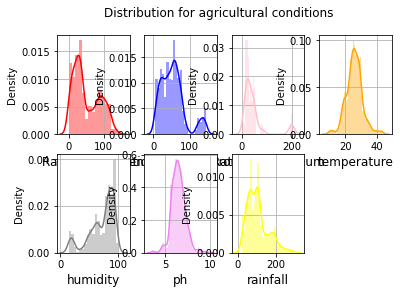

In [14]:
plt.subplot(2,4,1)   
sns.distplot(df['N'],color = 'red')
plt.xlabel('Ratio of Nitrogen',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'],color = 'blue')
plt.xlabel('Ratio of phosphorous',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['K'],color = 'pink')
plt.xlabel('Ratio of potassium',fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'],color = 'orange')
plt.xlabel('temperature',fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['humidity'],color= 'grey')
plt.xlabel('humidity',fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['ph'],color= 'violet')
plt.xlabel('ph',fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['rainfall'],color= 'yellow')
plt.xlabel('rainfall',fontsize = 12)
plt.grid()

plt.suptitle('Distribution for agricultural conditions',fontsize = 12)

In [15]:
print('                                              Some interesting patterns')
print('============================================================================================================================')
print('    Crops which requires high ratio of Nitrogen content in soil',df[df['N']>100]['label'].unique())
print('    Crops which requires high ratio of phosphorous content in soil',df[df['P']>100]['label'].unique())
print('    Crops which requires high ratio of potassium content in soil',df[df['K']>200]['label'].unique())
print('    Crops which requires high rainfall',df[df['rainfall']>200]['label'].unique())
print('    Crops which requires low temperature',df[df['temperature']<10]['label'].unique())
print('    Crops which requires high temperature',df[df['temperature']>40]['label'].unique())
print('    Crops which requires low ph',df[df['ph']<4]['label'].unique())
print('    Crops which requires high ph',df[df['ph']>9]['label'].unique())
print('    Crops which requires low humidity',df[df['humidity']<20]['label'].unique())

                                              Some interesting patterns
    Crops which requires high ratio of Nitrogen content in soil ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']
    Crops which requires high ratio of phosphorous content in soil ['grapes' 'apple']
    Crops which requires high ratio of potassium content in soil ['grapes' 'apple']
    Crops which requires high rainfall ['rice' 'papaya' 'coconut']
    Crops which requires low temperature ['grapes']
    Crops which requires high temperature ['grapes' 'papaya']
    Crops which requires low ph ['mothbeans']
    Crops which requires high ph ['mothbeans']
    Crops which requires low humidity ['chickpea' 'kidneybeans']


In [16]:
print('Summer Crops')
print('===============================================================================')
print(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())
print('Winter Crops')
print('===============================================================================')
print(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())
print('Rainy Crops')
print('===============================================================================')
print(df[(df['rainfall']>200) & (df['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


In [17]:
# clustering analysis

from sklearn.cluster import KMeans

# removing the labels column

x = df.drop(['label'],axis= 1)

# selecting alll the values of the data

x = x.values

# checking the shape

print(x.shape)

(2200, 7)


In [19]:
# for performing clustering analysis we must know how many clusters should be there hence we use elbow method and identify no. of clusters
# if there are more thsn one elbow then we have to chosse the last elbow
# rc params is the dictionary object that allowas you to customize defAult settings for your plots

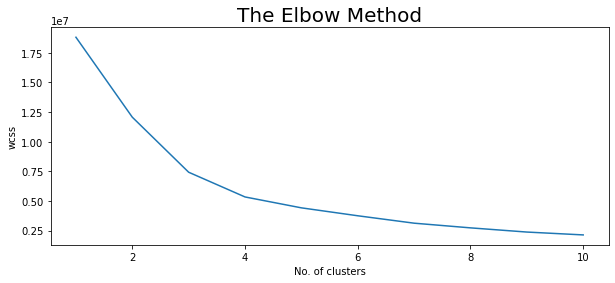

In [23]:
plt.rcParams['figure.figsize'] = (10,4) # default size of plot is 6.4 in width and 4.8 in height( in inches)

wcss = [] # wcss is within cluster sum of square
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0) # kmeans++ sekects initial cluster centroids using sampling based on empirical probablity distribution of points
    # n_init means no. of times kmeans algorithm runs with differnet centroiod seeds
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize = 20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()


In [32]:
km = KMeans(n_clusters = 4,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
y_means = km.fit_predict(x)

a =  df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})


print('lets chech the results after appling kmeans clustreing algo')
print("crops in  firstv cluster:",z[z['cluster']==0]['label'].unique())
print("****************************************************************")
print("crops in second cluster:",z[z['cluster']==1]['label'].unique())
print("******************************************************************")
print("crops in third cluster:",z[z['cluster']==2]['label'].unique())
print("********************************************************************")
print("crops i n forth cluster:",z[z['cluster']==3]['label'].unique())

lets chech the results after appling kmeans clustreing algo
crops in  firstv cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
****************************************************************
crops in second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
******************************************************************
crops in third cluster: ['grapes' 'apple']
********************************************************************
crops i n forth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [33]:
y = df['label']
x = df.drop(['label'],axis=1)

print('shape of x:',x.shape)
print('shape of y:',y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2,random_state = 0)

print('shape of x train',x_train.shape)
print('shape of x test',x_test.shape)
print('shape of y_train',y_train.shape)
print('shape of y test',y_test.shape)

shape of x train (1760, 7)
shape of x test (440, 7)
shape of y_train (1760,)
shape of y test (440,)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


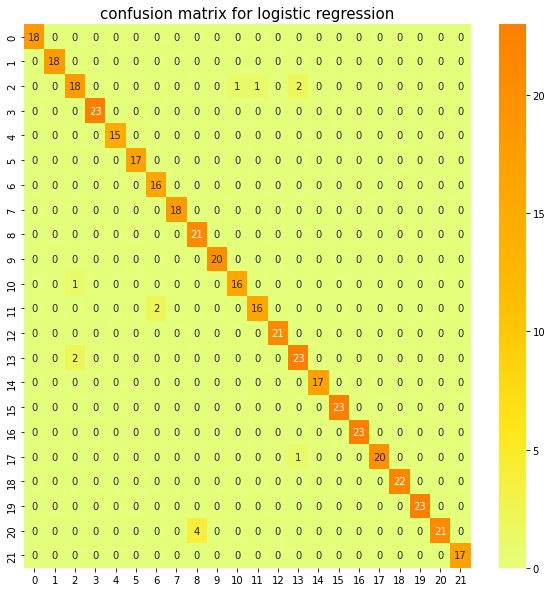

In [38]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize']= (10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = 'Wistia')
plt.title('confusion matrix for logistic regression',fontsize = 15)
plt.show()

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [42]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [43]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print('the suggested crop fo given climatic conditon is:',prediction)

the suggested crop fo given climatic conditon is: ['rice']


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
prediction = model.predict((np.array([[90,50,40,50,80,7,140]])))
print('the suggested crop fo given climatic conditon is:',prediction)

the suggested crop fo given climatic conditon is: ['maize']


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
